In [1]:
import os, sys, inspect

current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir)
import plotly.express as px

from brian2 import *
import Documentation.parameters as p

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


from Final_code.ModelsandCalculations import NetworkRun as forw

defaultclock = p.dt*ms

In [2]:
#setting the font sizes

SMALL_SIZE = 13
MEDIUM_SIZE = 16
BIGGER_SIZE = 19

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [3]:
scales  = [23]
weights = [15]

In [4]:
data_PC = pd.DataFrame()
data_IN = pd.DataFrame()

for scale in scales:
    output_PC, output_IN, spiketrain = forw.forward_run(scale, weights, p.seed)
    output_PC.replace(r'\\n', ' ', regex= True)
    output_IN.replace(r'\\n', ' ', regex= True)

    data_IN = pd.concat([data_IN, output_IN])
    data_PC = pd.concat([data_PC, output_PC])

In [5]:
scales  = [17,18,19,20,21,22,23]
weights = [5, 10, 15, 20, 25 ,30]

In [6]:
data_PC = pd.DataFrame()
data_IN = pd.DataFrame()

for scale in scales:
    output_PC, output_IN, spiketrain = forw.forward_run(scale, weights, p.seed)
    output_PC.replace(r'\\n', ' ', regex= True)
    output_IN.replace(r'\\n', ' ', regex= True)

    data_IN = pd.concat([data_IN, output_IN])
    data_PC = pd.concat([data_PC, output_PC])

no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down sp

In [7]:
subset = ['weights', 'scales', 'MI']
subset2 = ['L_i', 'L']

In [8]:
my_data = data_PC[subset]

In [35]:
data = np.reshape(data_PC['MI'].to_numpy(), (len(scales), len(weights)))
fig = px.imshow(data,
                labels=dict(x="weight (mV)", y="scaling factor (\u03bcA)", color="MI"),
                x=weights,
                y=scales,
                title = 'Mutual information of the post-synaptic PC neuron'
                )

fig.update_xaxes(side="top")
fig.show()

In [36]:
data = np.reshape(data_PC['F_I'].to_numpy(), (len(scales), len(weights)))
fig = px.imshow(data,
                labels=dict(x="weight (mV)", y="scaling factor (\u03bcA)", color="FI"),
                x=weights,
                y=scales,
                title ='Fraction transferred information of the post-synaptic PC neuron'
                )
fig.update_xaxes(side="top")
fig.show()

In [11]:
PC_spikes = np.reshape(data_PC['spikes'].to_numpy(), ((len(scales), len(weights))))[:,0]
IN_spikes = np.reshape(data_IN['spikes'].to_numpy(), ((len(scales), len(weights))))[:,0]

In [12]:
PC_spikes_1 = [PC_spikes[i][0] for i in range(len(scales))]
PC_spikes_2 = [PC_spikes[i][1] for i in range(len(scales))]
IN_spikes   = [IN_spikes[i] for i in range(len(scales))]

In [13]:
len(scales)

7

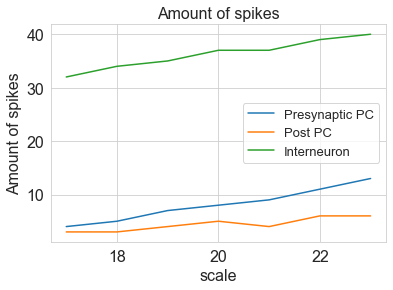

In [14]:
plt.title('Amount of spikes')
plt.plot(scales ,PC_spikes_1, label='Presynaptic PC')
plt.plot(scales ,PC_spikes_2, label='Post PC')
plt.plot(scales ,IN_spikes, label='Interneuron')
plt.legend()
plt.xlabel('scale')
plt.ylabel('Amount of spikes')
plt.show()

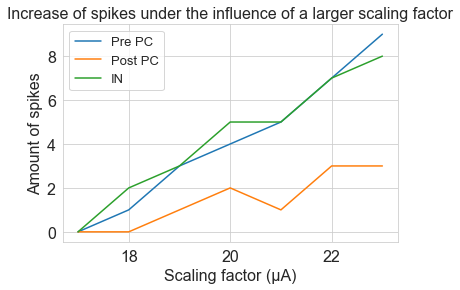

In [15]:
plt.title('Increase of spikes under the influence of a larger scaling factor')
plt.plot(scales ,PC_spikes_1-PC_spikes_1[0], label='Pre PC')
plt.plot(scales ,PC_spikes_2-PC_spikes_2[0], label='Post PC')
plt.plot(scales ,IN_spikes-IN_spikes[0], label='IN')
plt.legend()
plt.xlabel('Scaling factor (\u03bcA)')
plt.ylabel('Amount of spikes')
plt.show()

# Run now a neutral model to equate the difference

In [16]:
from Final_code.ModelsandCalculations import NetworkRun as neutr

In [17]:
scales  = [17,18,19,20,21,22,23]
weights = [5, 10, 15, 20, 25 ,30]

In [18]:
data_PC_neutr = pd.DataFrame()

for scale in scales:
    output_PC_neutr, spiketrain_neutr = neutr.neutral_run(scale, weights, p.seed)
    output_PC_neutr.replace(r'\\n', ' ', regex= True)
    data_PC_neutr = pd.concat([data_PC_neutr, output_PC_neutr])

no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one
no down spikes, inventing one


In [19]:
subset_neutr = ['weights', 'scales', 'MI']
subset2_neutr = ['L_i', 'L']

In [20]:
my_data_neutr = data_PC_neutr[subset_neutr]

In [40]:
data = np.reshape(data_PC_neutr['MI'].to_numpy(), (len(scales), len(weights)))
fig = px.imshow(data,
                labels=dict(x="weight (mV)", y="scaling factor (\u03bcA)", color="MI"),
                x=weights,
                y=scales,
                title = 'Mutual information of the pre-synaptic PC neuron'
                )

fig.update_xaxes(side="top")
fig.show()
fig.write_image("C:/Users/laure/OneDrive/Documenten/Organisatie/Studie/Stage/test.png")

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [37]:
data = np.reshape(data_PC_neutr['F_I'].to_numpy(), (len(scales), len(weights)))
fig = px.imshow(data,
                labels=dict(x="weight (mV)", y="scaling factor (\u03bcA)", color="FI"),
                x=weights,
                y=scales,
                title ='Fraction of the transferred information of the pre-synaptic PC neuron'
                )
fig.update_xaxes(side="top")
fig.show()


### Difference in fraction and mutual information between the neurons


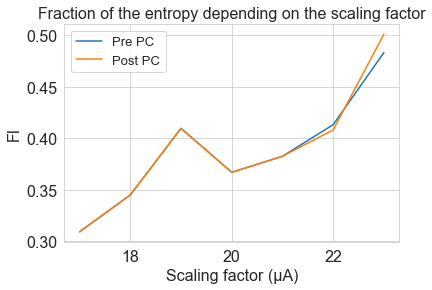

In [41]:
plt.title('Fraction of the entropy depending on the scaling factor')
plt.plot(scales, data_PC_neutr['F_I'].to_numpy().reshape(len(scales),len(weights))[:,0], label='Pre PC')
plt.plot(scales, data_PC['F_I'].to_numpy().reshape(len(scales),len(weights))[:,0], label='Post PC')
plt.legend()
plt.xlabel('Scaling factor (\u03bcA)')
plt.ylabel('FI')
plt.show()

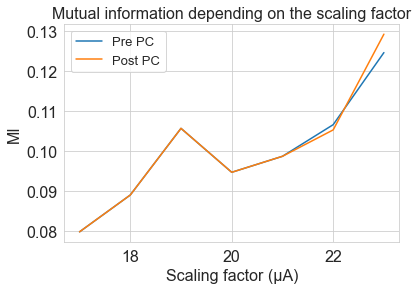

In [24]:
plt.title('Mutual information depending on the scaling factor')
plt.plot(scales, data_PC_neutr['MI'].to_numpy().reshape(len(scales),len(weights))[:,0], label='Pre PC')
plt.plot(scales, data_PC['MI'].to_numpy().reshape(len(scales),len(weights))[:,0], label='Post PC')
plt.legend()
plt.xlabel('Scaling factor (\u03bcA)')
plt.ylabel('MI')
plt.show()

In [31]:
compare_data = np.reshape((data_PC['MI'].to_numpy() - data_PC_neutr['MI'].to_numpy()), (len(scales), len(weights)))
fig = px.imshow(compare_data,
                labels=dict(x="weight (mV)", y="scaling factor (\u03bcA)", color="FI"),
                x=weights,
                y=scales,
                title ='Comparison of the presynaptic and post-synaptic neuron'
                )
fig.update_xaxes(side="top")
fig.show()


In [33]:
compare_data = np.reshape((data_PC['F_I'].to_numpy() - data_PC_neutr['F_I'].to_numpy()), (len(scales), len(weights)))
fig = px.imshow(compare_data,
                labels=dict(x="weight (mV)", y="scaling factor (\u03bcA)", color="FI"),
                x=weights,
                y=scales,
                title ='Comparison of the presynaptic and post-synaptic neuron FI'
                )
fig.update_xaxes(side="top")
fig.show()
